In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from datetime import datetime
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [ ]:
#Primero trabajaré con el df de Apple y posteriormente usaré el de Google

In [97]:
data_apple = pd.read_csv('applemobilitytrends-2021-12-05.csv')
#codigo para cargar el df de apple

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [98]:
data_apple.head()
#se visualiza como estan estructurados los datos del df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,181.39,175.75,180.37,166.94,152.35,151.20,141.39,163.52,172.67,162.12
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,200.72,195.78,159.66,164.26,181.32,224.26,210.36,215.39,214.93,156.72
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,131.87,141.64,77.77,86.90,93.26,100.08,104.56,135.03,146.15,91.97
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,121.46,114.41,55.37,89.50,94.21,99.95,103.63,125.52,123.87,71.43
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,132.88,109.25,116.27,120.49,128.27,130.51,135.67,143.79,113.66,121.15


In [99]:
df_apple_santiago = data_apple.loc[data_apple.loc[:, 'sub-region'] == 'Santiago Metropolitan Region']
df_apple_santiago
#limpiamos los datos para obtener solo los correspondientes a la region metropolitana de Chile

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,140.18,124.89,77.73,101.78,109.77,116.10,115.88,154.11,134.38,84.19
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,122.01,99.27,57.31,97.68,106.98,115.78,111.88,137.30,109.89,62.87


In [100]:
df2 = df_apple_santiago.drop(['region','sub-region','geo_type', 'alternative_name', 'country'], axis = 1)
df2
#con este codigo se eliminan las columnas que no son de importancia para el análisis

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
791,driving,100.0,101.96,105.49,107.92,120.69,98.55,67.72,95.29,98.78,...,140.18,124.89,77.73,101.78,109.77,116.10,115.88,154.11,134.38,84.19
792,walking,100.0,104.69,106.20,105.99,105.57,69.28,43.79,94.13,95.19,...,122.01,99.27,57.31,97.68,106.98,115.78,111.88,137.30,109.89,62.87


In [101]:
df3 = df2.groupby('transportation_type').sum()
df3
#Con este código, se elimina la columna que contiene los número a la izquierda que no son relevantes para el análisis

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
transportation_type,,,,,,,,,,,,,,,,,,,,,
driving,100.0,101.96,105.49,107.92,120.69,98.55,67.72,95.29,98.78,98.15,...,140.18,124.89,77.73,101.78,109.77,116.10,115.88,154.11,134.38,84.19
walking,100.0,104.69,106.20,105.99,105.57,69.28,43.79,94.13,95.19,98.17,...,122.01,99.27,57.31,97.68,106.98,115.78,111.88,137.30,109.89,62.87


In [102]:
df4 = df3.transpose()
df4
#Con este codigo, se obtiene la traspuesta de la matriz antorior, para facilitar el proceso de hacer los gráficos

transportation_type,driving,walking
2020-01-13,100.00,100.00
2020-01-14,101.96,104.69
2020-01-15,105.49,106.20
2020-01-16,107.92,105.99
2020-01-17,120.69,105.57
...,...,...
2021-12-01,116.10,115.78
2021-12-02,115.88,111.88
2021-12-03,154.11,137.30
2021-12-04,134.38,109.89


In [103]:
df4.reset_index(level=0, inplace=True)
df4.head()
# Se resetea la primera columna para poder dejar la columna 'index' con formato fecha posteriormente.

transportation_type,index,driving,walking
0,2020-01-13,100.00,100.00
1,2020-01-14,101.96,104.69
2,2020-01-15,105.49,106.20
3,2020-01-16,107.92,105.99
4,2020-01-17,120.69,105.57


In [104]:
df5 = df4.rename(columns={'index':'Fecha'})
df5
#se cambia el nombre de la columna index a fecha

transportation_type,Fecha,driving,walking
0,2020-01-13,100.00,100.00
1,2020-01-14,101.96,104.69
2,2020-01-15,105.49,106.20
3,2020-01-16,107.92,105.99
4,2020-01-17,120.69,105.57
...,...,...,...
688,2021-12-01,116.10,115.78
689,2021-12-02,115.88,111.88
690,2021-12-03,154.11,137.30
691,2021-12-04,134.38,109.89


In [105]:
df5['Fecha'] = pd.to_datetime(df5['Fecha'], errors = 'coerce')
df5.head()
# se le da formato de fecha a la columna de Fechas

transportation_type,Fecha,driving,walking
0,2020-01-13,100.00,100.00
1,2020-01-14,101.96,104.69
2,2020-01-15,105.49,106.20
3,2020-01-16,107.92,105.99
4,2020-01-17,120.69,105.57


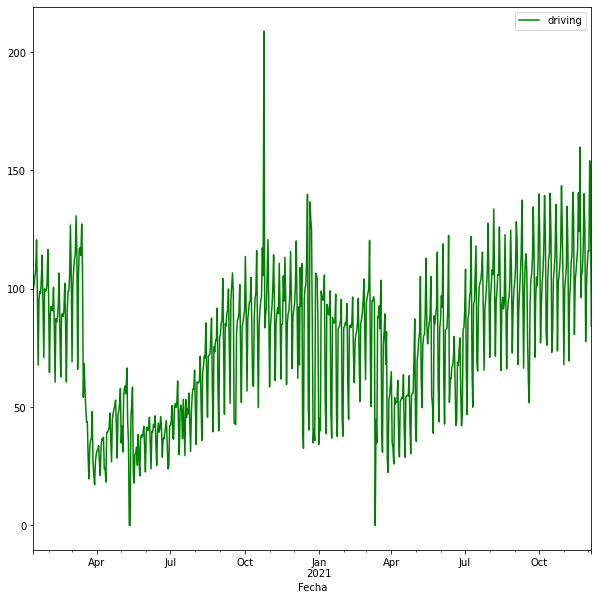

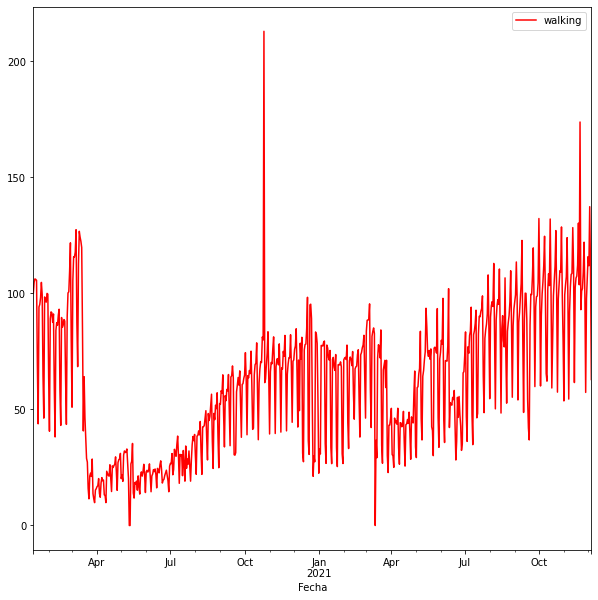

In [106]:
Grafico_Apple_driving = df5.plot(x='Fecha', y='driving', kind="line",figsize=(10,10), color = 'g')
Grafico_Apple_walking = df5.plot(x='Fecha', y='walking', kind="line",figsize=(10,10), color = 'r')
#Aqui se obtiene un grafico por cada formato de mobilidad (driving y walking)


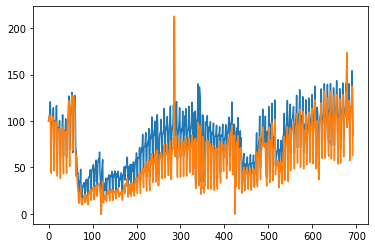

In [107]:
plt.plot(df5['driving'], label= df5['Fecha'])
plt.plot(df5['walking'], label= df5['Fecha'])
plt.show()
#Con este gráfico se aprecia que la gente que se mueve en auto ha sido superior a la que se mueve caminando en prácticamente todo el tiempo de análisis (2020-01-13 // 2021-12-05)

In [108]:
dfgoogle = pd.read_csv('Global_Mobility_Report.csv')
#codigo para cargar el df de google

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
dfgoogle.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [115]:
dfg2 = dfgoogle.loc[dfgoogle.loc[:, 'country_region'] == 'Chile']
dfg2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2190560,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
2190561,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2190562,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
2190563,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
2190564,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0


In [120]:
dfg3 = dfg2.loc[dfg2.loc[:, 'sub_region_1'] == 'Santiago Metropolitan Region']
dfg3.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2224492,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2224493,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2224494,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2224495,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2224496,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [121]:
dfg4 = dfg3.drop(['country_region_code','country_region','sub_region_1', 'sub_region_2', 'metro_area','iso_3166_2_code','census_fips_code','place_id','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline'], axis = 1)
dfg4

,date,parks_percent_change_from_baseline
2224492,2020-02-15,-9.0
2224493,2020-02-16,-12.0
2224494,2020-02-17,-10.0
2224495,2020-02-18,-10.0
2224496,2020-02-19,-10.0
...,...,...
2229093,2021-11-29,6.0
2229094,2021-11-30,13.0
2229095,2021-12-01,5.0
2229096,2021-12-02,14.0


In [122]:
dfg4['date'] = pd.to_datetime(dfg4['date'], errors = 'coerce')
dfg4.head()

,date,parks_percent_change_from_baseline
2224492,2020-02-15,-9.0
2224493,2020-02-16,-12.0
2224494,2020-02-17,-10.0
2224495,2020-02-18,-10.0
2224496,2020-02-19,-10.0


In [123]:
dfg5 = dfg4.rename(columns={'date':'Fecha'})
dfg6 = dfg5.rename(columns={'parks_percent_change_from_baseline':'Cambio porcentual de parques c/r a la línea base'})
dfg6

,Fecha,Cambio porcentual de parques c/r a la línea base
2224492,2020-02-15,-9.0
2224493,2020-02-16,-12.0
2224494,2020-02-17,-10.0
2224495,2020-02-18,-10.0
2224496,2020-02-19,-10.0
...,...,...
2229093,2021-11-29,6.0
2229094,2021-11-30,13.0
2229095,2021-12-01,5.0
2229096,2021-12-02,14.0


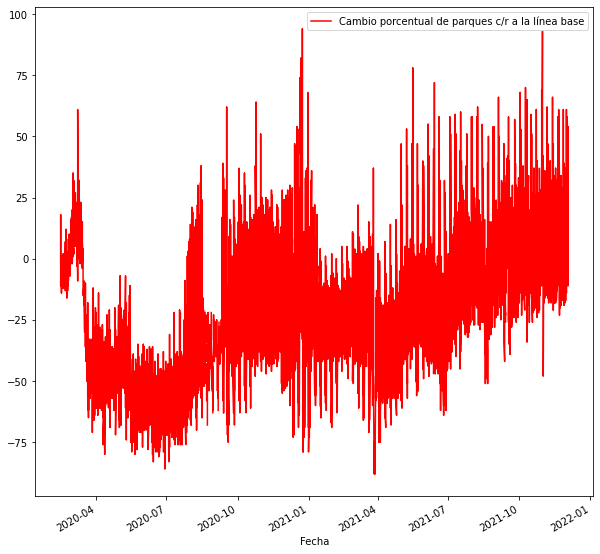

In [124]:
Grafico_Google_Parques = dfg6.plot(x='Fecha', y='Cambio porcentual de parques c/r a la línea base', kind="line",figsize=(10,10), color = 'r')

In [125]:
#Se puede concluir del gráfico anterior, que la movilidad en los parques disminuyó con la cuarentena, sin embargo, se comenzó a normalizar, y de hecho, aumentar el uso de parques posterior a agosto de 2021.